In [50]:
import numpy as np
import matplotlib.pyplot as plt
import unyt
import swiftsimio as sw
import h5py
from scipy.spatial.transform import Rotation as Ro
from pathlib import Path
from PIL import Image
#xray_lum offset>0.2:2.,  13.,  21.,  50.,  64.,  66.,  82., 105
path="/home/jyang/data/Flamingo/L0200N0360/halo_particles/"


f=h5py.File(path+'66.hdf5','r')

Coord_g=np.array(f['PartType1']["Coordinates"])

Coord_dm=f['PartType2']["Coordinates"]
xyz_dm=np.array(Coord_dm).T 
xyz_g=np.array(Coord_g).T

xray_lum=np.array(f['PartType1']['xray_lum_erosita_low'])+np.array(f['PartType1']['xray_lum_erosita_high'])
#xray_lum=np.array(f['PartType1']['xray_lum_rosat'])
T=np.array(f['PartType1']['temperatures'])
f.close()
x_dm=xyz_dm[0]
r=np.max(x_dm)
x_dm=x_dm/r
y_dm=xyz_dm[1]
y_dm=y_dm/r
z_dm=xyz_dm[2]
z_dm=z_dm/r
x_g=xyz_g[0]
x_g=x_g/r
y_g=xyz_g[1]
y_g=y_g/r
z_g=xyz_g[2]
z_g=z_g/r
r_g=np.sqrt(x_g**2+y_g**2+z_g**2)
f=h5py.File(path+'2stars.hdf5','r')
xyz=np.array(f['PartType0']["Coordinates"])
xyz_star=np.array(xyz).T
x_star=xyz_star[0]
x_star=x_star/r
y_star=xyz_star[1]
y_star=y_star/r
z_star=xyz_star[2]
z_star=z_star/r
r_star=np.sqrt(x_star**2+y_star**2+z_star**2)
f.close()
print(r)
xm=x_g[xray_lum==np.max(xray_lum)][0]
ym=y_g[xray_lum==np.max(xray_lum)][0]
zm=z_g[xray_lum==np.max(xray_lum)][0]
#axis=np.array([ 0.7208, 0.9334, 0.9379 ])
axis=np.array([ 0,0,0])
rotation = Ro.from_rotvec(-axis)

rotated_points = rotation.apply(Coord_g)/r
xlum_m=rotation.apply(np.array([xm,ym,zm]))
folder = "/home/jyang/plot/Flamingo/L0200N0720/halo_2d_lum_rotate/66_kde0/"
imgg = Image.open(folder+" 0.7208, 0.9334, 0.9379 .png")#.convert("L")
img_array = np.array(imgg)

pixel_x=len(img_array[0])
pixel_y=len(img_array[:,0])
max_position = np.unravel_index(np.argmax(img_array), img_array.shape)
    
x=(max_position[1]/pixel_y-0.5)*2
y=((1-max_position[0]/pixel_x)-0.5)*2
print(x,y,xlum_m[0],xlum_m[1],xlum_m[2])

3.0487107763053416
-0.866 -0.010000000000000009 -0.021143952549103624 0.013015747990375899 -0.17239410514967618


/tmp/ipykernel_2015339/714112736.py:10: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(r_g,np.log10(B),color='r',s=0.1)


Text(0, 0.5, 'log(soft)xray_lum')

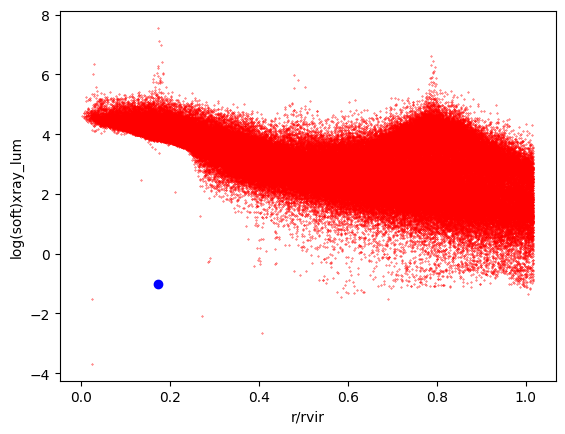

In [62]:
import matplotlib.pyplot as plt
from matplotlib import colors
title="M>1e14"
boxused="/Flamingo/L0200N0720/"
#  x=np.append(x_dm[i],x_g[i])
#  y=np.append(y_dm[i],y_g[i])
fig = plt.figure()
ax=plt.subplot(1,1,1)
B=xray_lum
ax.scatter(r_g,np.log10(B),color='r',s=0.1)
ax.plot(np.sqrt(x**2+y**2),np.log10(0.1),color='b',marker='o')
ax.set_xlabel("r/rvir")
ax.set_ylabel("log(soft)xray_lum")

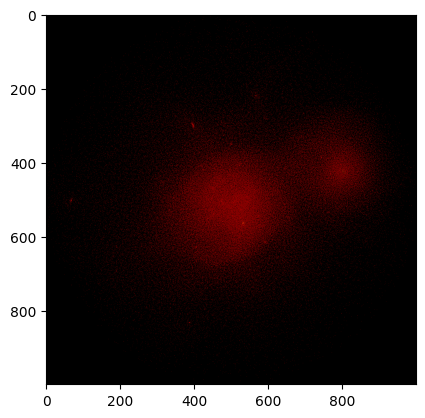

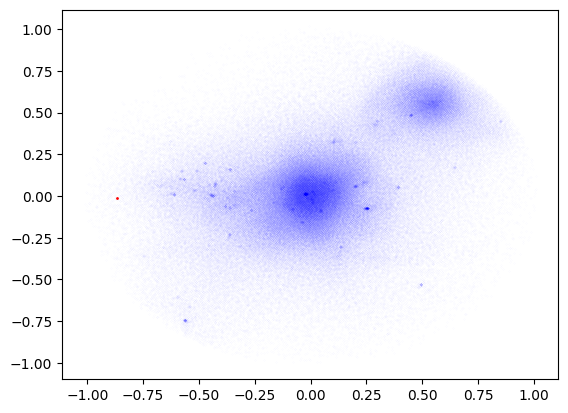

In [71]:

plt.imshow(imgg)
fig = plt.figure()
ax=plt.subplot(1,1,1)
ax.scatter(rotated_points[:,0],rotated_points[:,1],color='b',s=0.0001)
#print(len(x_g[np.log10(T)<5]))
ax.scatter(x,y,color='r',s=1)

(np.int64(46), np.int64(48), np.int64(50))
(np.int64(46), np.int64(48), np.int64(50))


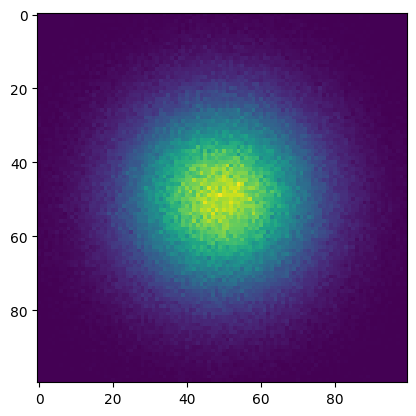

In [2]:
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
num_samples = 10000
random_numbers = np.random.normal(0, 1, (300**3, 3))
random_numbers2 = np.random.normal((0,0,1), 0.01, (int(27), 3))


fig, ax = plt.subplots()

h=np.histogramdd(random_numbers,bins=100,range=[[-3,3],[-3,3],[-3,3]])
h2=np.histogramdd(random_numbers2,bins=100,range=[[-3,3],[-3,3],[-3,3]])

array=h[0]+h2[0]
#folder = "/home/jyang/plot/Flamingo/L0200N0720/halo_2d_lum_rotate/66_kde0/"
#img = Image.open(folder+" 0.7208, 0.9334, 0.9379 .png")#.convert("L")
#img_array = np.array(img)
max=np.unravel_index(np.argmax(array), array.shape)
print(max)
img_smooth = gaussian_filter(array, sigma=0.01,mode='constant',truncate=3.0)
max2=np.unravel_index(np.argmax(img_smooth ), img_smooth.shape)
print(max2)
plt.imshow(array[50])
#plt.imshow(img_smooth)

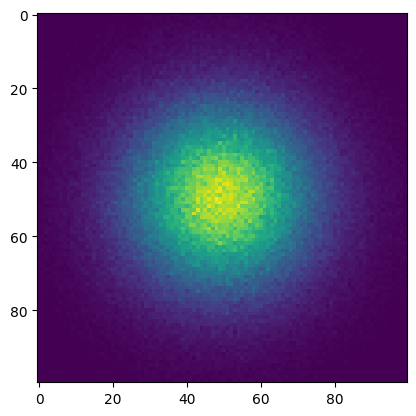

In [13]:
plt.imshow(img_smooth[49])

In [57]:
hist=np.histogramdd(Coord_g/r,bins=100,range=[[-1,1],[-1,1],[-1,1]],weights=xray_lum)
#img2=np.sum(hist[0],axis=0)
#hist=[]
#img1=np.sum(hist[0],axis=0)
#img_smooth = gaussian_filter(hist[0], sigma=2,mode='constant',truncate=3.0)


/tmp/ipykernel_2091714/2529816996.py:2: RuntimeWarning: divide by zero encountered in log10
  img_smooth=np.log10(img_smooth)
/tmp/ipykernel_2091714/2529816996.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img2))


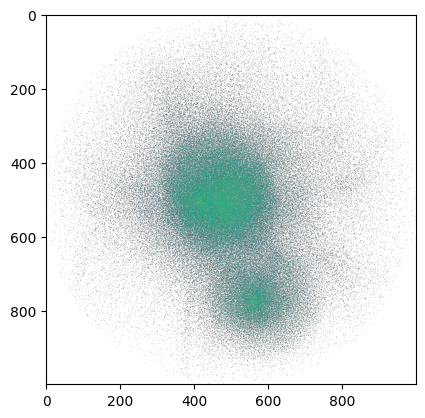

In [27]:

img_smooth = gaussian_filter(img2,sigma=1,mode='constant',truncate=2.0)
img_smooth=np.log10(img_smooth)
plt.imshow(np.log10(img2))

101


/tmp/ipykernel_2381478/3506977509.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(img1))


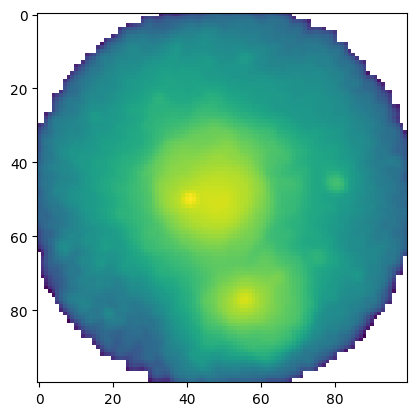

In [58]:
img_smooth = gaussian_filter(hist[0],sigma=1,mode='constant',truncate=2.0)
print(len(hist[1][0]))
img1=np.sum(img_smooth,axis=0)
plt.imshow(np.log10(img1))

[array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ]), array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.

/tmp/ipykernel_2381478/423030951.py:18: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(ra,np.log10(density),color='r',s=0.1)


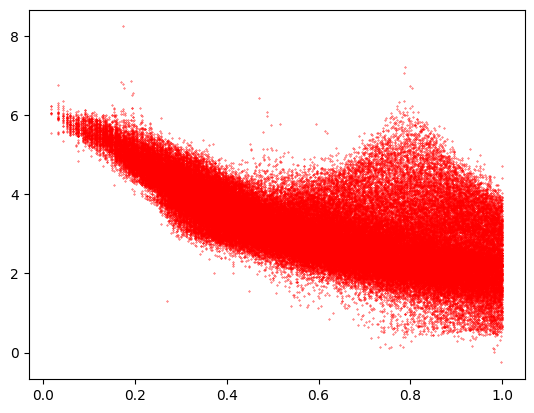

In [ ]:
#make scatter plot of xraylum and r with the 3d hist and the smoothed 3d hist
density=hist[0]


print(edge)
n=100
ra=np.zeros(shape=(n,n,n))
for i in range(0,n):
    for j in range(0,n):
        for k in range(0,n):
            ra[i][j][k]=np.sqrt(((edge[0][i]+edge[0][i+1])/2)**2+
            ((edge[1][j]+edge[1][j+1])/2)**2+((edge[2][k]+edge[2][k+1])/2)**2)
density=density[ra<1]
ra=ra[ra<1]
fig = plt.figure()
ax=plt.subplot(1,1,1)

ax.scatter(ra,np.log10(density),color='r',s=0.1)


/tmp/ipykernel_2381478/364687478.py:8: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(ra[ra<1],np.log10(img_smooth[ra<1]),color='r',s=0.1,alpha=0.1)


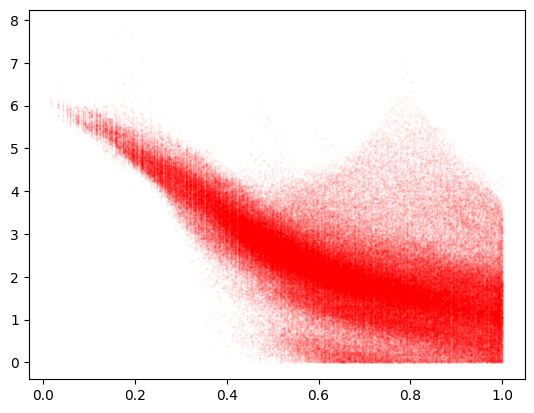

In [60]:
hist=0
img_smooth = gaussian_filter(density,sigma=1,mode='constant',truncate=3.0)
img_smooth[img_smooth<10**0]=0

fig = plt.figure()
ax=plt.subplot(1,1,1)

ax.scatter(ra[ra<1],np.log10(img_smooth[ra<1]),color='r',s=0.1,alpha=0.1)